#**Simple Linear Regression**

In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Height-Weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


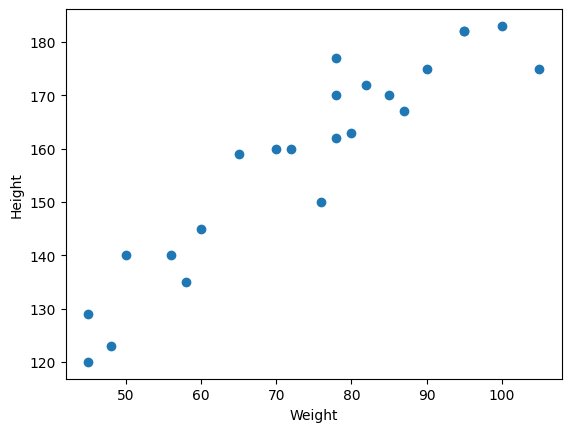

In [ ]:
#scattering the data
plt.scatter(df["Weight"], df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [ ]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.217391
std,17.872407,19.364815
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,173.500000
max,105.000000,183.000000


In [ ]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [ ]:
#divide the data into dependent and independent fetures
X = df[["Weight"]] #must in array format
y = df["Height"] #must in series format

In [ ]:
X.shape, y.shape

((23, 1), (23,))

In [ ]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
#import train and test split for splitting the dataset
from sklearn.model_selection import train_test_split

In [ ]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

In [ ]:
y_train.shape, y_test.shape

((18,), (5,))

- used the standard scaling for upscaling or downscaling
- here, we downscaling the weight between 0 and 1
- used on train and test dataset

In [ ]:
#import the standard scalar
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train) #downscaling the X_train

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [ ]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

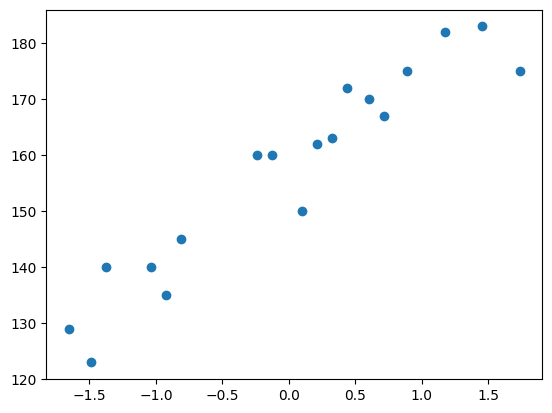

In [ ]:
plt.scatter(X_train, y_train)

In [ ]:
#import the library to train the model
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
#training the train data
regressor.fit(X_train, y_train) #fit - means to fit the model

LinearRegression()

In [ ]:
regressor.intercept_ #intercept_ means theta0 from {theta0 - H(theta1(x)1)}

157.27777777777777

In [ ]:
regressor.coef_ #coef_(slope) means theta1 from {theta0 - H(theta1(x)1)}

array([16.9373913])

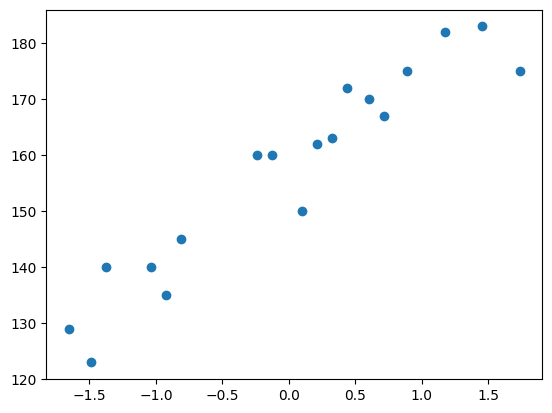

In [ ]:
plt.scatter(X_train, y_train)

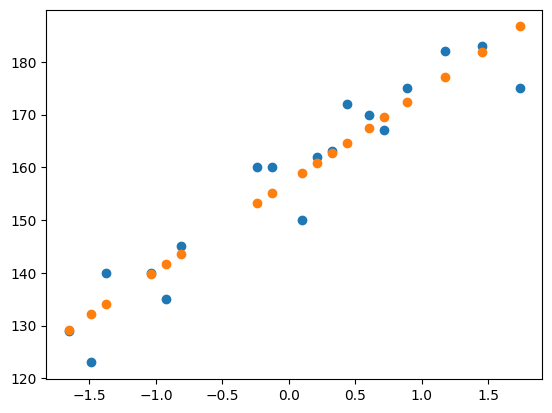

In [ ]:
#predicting the line on base of X_train data
plt.scatter(X_train, y_train)
plt.scatter(X_train, regressor.predict(X_train))

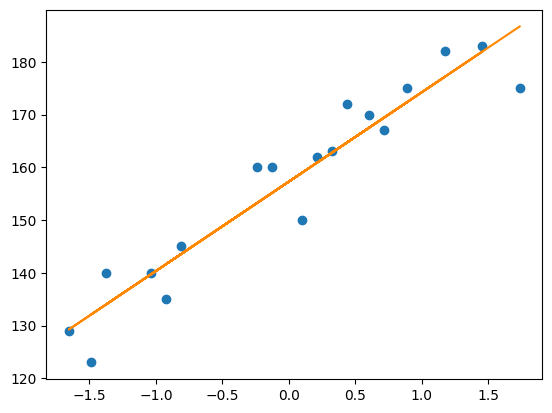

In [ ]:
#predicting the line on base of X_train data
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), "#FF8800")

`regressor.predict(X_train)` is then predicting the output values based on the input features `X_train`. So, it's generating predicted values for each input data point in `X_train`.

* `X` is the input - ("Weight")
* `y` is the output - ("Height")

**Prediction of train data**
* predicted height output = intercept + coef_*(weight)
* y_pred_test = 157.2 + 16.93*(X_train)

**Prediction of test data**
* predicted height output = intercept + coef_*(weight)
* y_pred_test = 157.2 + 16.93*(X_test)

In [ ]:
#prediction for test data
y_pred_test = regressor.predict(X_test)

In [ ]:
y_pred_test

array([160.84203257, 160.84203257, 129.2425199 , 177.1205694 ,
       148.3937397 ])

In [ ]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [ ]:
### performance metrics MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

113.33481065437608
10.008829129220965
10.645882333295633


### Finding the accracy of model by r2 and ajusted r2

In [ ]:
#import the library
from sklearn.metrics import r2_score

In [ ]:
#score of r2 performance metric
r2_score = r2_score(y_test, y_pred_test)
r2_score

0.7697570074468225

In [ ]:
#score for ajusted r2 performace metrics
adj_r2_score = 1 - (1-r2_score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)
adj_r2_score

0.69300934326243

In [ ]:
X_test.shape[1] #means number of features in output dataset

1